#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [1]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('/content/Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import numpy as np

In [3]:
## 1
#
row = len(df.axes[0])
col = len(df.axes[1])
print("Number of Row: " , row)
print("Number of Columns: " , col)

print("--------------------------------------")

#
print("Data Type for each column: \n", df.dtypes)

print("--------------------------------------")

#
print("Missing values in each column: \n" , df.isnull().sum())


Number of Row:  148654
Number of Columns:  13
--------------------------------------
Data Type for each column: 
 Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object
--------------------------------------
Missing values in each column: 
 Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


In [4]:
## 2
#
print('Mean Salary:' , df['TotalPay'].mean())
print('Median Salary:' , df['TotalPay'].median())
print('Minimum Salary:' , df['TotalPay'].min())
print('Maximum Salary' , df['TotalPay'].max())
print('Range of Salaries: [' , df['TotalPay'].min() , ',' , df['TotalPay'].max(),']')
print('Standard Deviation: ' , df['TotalPay'].std())

Mean Salary: 74768.32197169267
Median Salary: 71426.60999999999
Minimum Salary: -618.13
Maximum Salary 567595.43
Range of Salaries: [ -618.13 , 567595.43 ]
Standard Deviation:  50517.00527394987


In [20]:
# 3
# For categorical variables like 'EmployeeName', 'JobTitle', 'Agency', 'Year'  you can fill missing values with the most frequent value in these columns (mode).
df['EmployeeName'].fillna(df['EmployeeName'].mode()[0], inplace=True)
df['JobTitle'].fillna(df['JobTitle'].mode()[0], inplace=True)
df['Agency'].fillna(df['Agency'].mode()[0], inplace=True)
df['Year'].fillna(df['Year'].mode()[0], inplace=True)

# For numerical columns like 'BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits', a common approach is to fill missing values with the mean or median.
df['BasePay'].fillna(df['BasePay'].mean(), inplace=True)
df['OvertimePay'].fillna(df['OvertimePay'].mean(), inplace=True)
df['OtherPay'].fillna(df['OtherPay'].mean(), inplace=True)
df['Benefits'].fillna(df['Benefits'].mean(), inplace=True)
df['TotalPay'].fillna(df['TotalPay'].mean(), inplace=True)
df['TotalPayBenefits'].fillna(df['TotalPayBenefits'].mean(), inplace=True)


# df.drop(columns=['Notes', 'Status'], inplace=True)

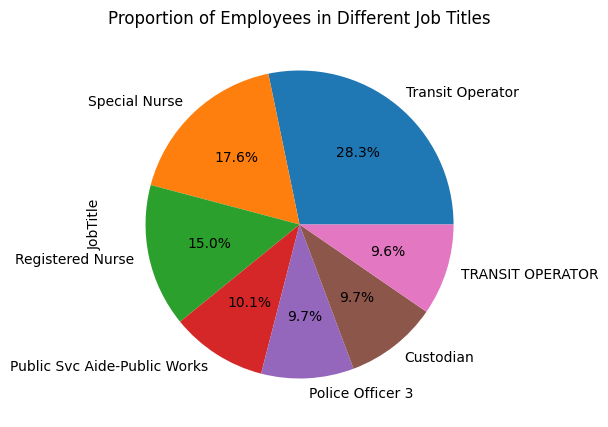

In [21]:
# 4
plt.figure(figsize=(10,5))
df['JobTitle'].value_counts().head(7).plot(kind='pie' , autopct='%1.1f%%')
plt.title('Proportion of Employees in Different Job Titles')
plt.show()

In [24]:
# 5
group = df.groupby('JobTitle')['TotalPay'].mean().sort_values(ascending=False)

print('Average salaries in different job Titles:')
print(group)

Average salaries in different job Titles:
JobTitle
GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY    399211.275000
Chief Investment Officer                          339653.700000
Chief of Police                                   329183.646667
Chief, Fire Department                            325971.683333
DEPUTY DIRECTOR OF INVESTMENTS                    307899.460000
                                                      ...      
Commissioner 16.700c, No Pay                          25.760000
IS Technician Assistant                                0.000000
Not provided                                           0.000000
Public Safety Comm Tech                                0.000000
Drug Court Coordinator                                 0.000000
Name: TotalPay, Length: 2159, dtype: float64


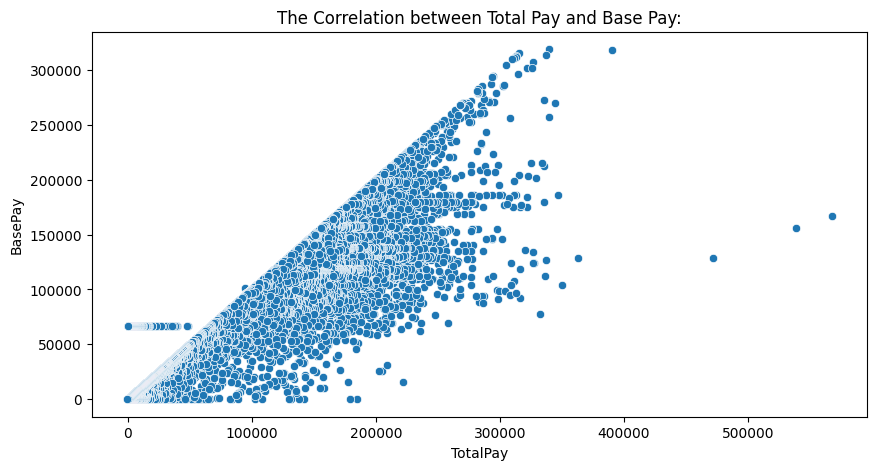

In [25]:
# 6
plt.figure(figsize=(10, 5))
sbn.scatterplot(x=df['TotalPay'], y=df['BasePay'])
plt.title('The Correlation between Total Pay and Base Pay:')
plt.show()

#7
In Task 1, it was possible to find the number of lines and columns using shape instead of axes

In Task 2, I used ready-made functions in Python to find the mean, median, minimum and maximum value, and standard deviation, which makes it easier for us to work.

In Task 3, I put an appropriate value in the empty cells according to the data style of each column (numeric, text).

In Task 4, I calculated the percentage of employees in the different JobTitles, where the first 7 JobTitles were displayed with the percentage for each specialty.

In Task 5, I grouped the data according to the JobTitle column, calculated the mean TotalPay for each group, and arranged the results in descending order.
The result is a series with the mean total pay for each job title, sorted from highest to lowest.

In Task 6, the relationship between the TotalPay column and BasePay was displayed graphically

# Good Luck!